In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
# pictures of tree
from graphviz import Source

# datasets
from sklearn.datasets import load_iris, make_moons

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

In [2]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]]
y_iris = iris.target

In [3]:
y_iris.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
export_graphviz(
 tree_clf,
 out_file="iris_tree.dot",
 feature_names=["petal length (cm)", "petal width (cm)"],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

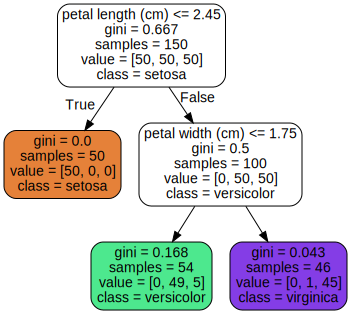

In [7]:
Source.from_file("iris_tree.dot")

In [8]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regularisierung

In [10]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

In [11]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [12]:
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [13]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

In [14]:
# result of tree1
display(accuracy_score(tree_clf1.predict(X_moons_test), y_moons_test))
tree_clf1.score(X_moons_test, y_moons_test)

0.898

0.898

In [15]:
# result of tree2
display(accuracy_score(tree_clf2.predict(X_moons_test), y_moons_test))
tree_clf2.score(X_moons_test, y_moons_test)

0.92

0.92

# Regression

In [16]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from graphviz import Source

In [17]:
np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad**2 + 0.025*np.random.randn(200,1)

In [18]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [19]:
export_graphviz(
 tree_clf,
 out_file="iris_tree.dot",
 feature_names=["petal length (cm)", "petal width (cm)"],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

In [20]:
export_graphviz(
        tree_reg, out_file='test_tree_regression.dot', rounded=True, filled=True
)

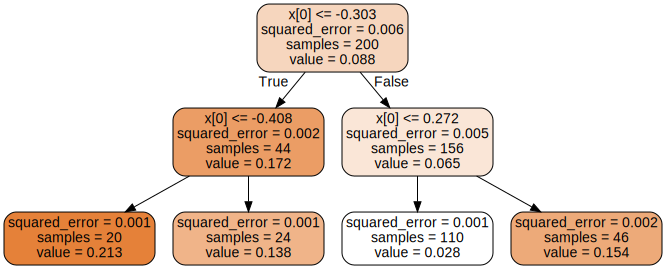

In [21]:
Source.from_file("test_tree_regression.dot")

In [22]:
X_iris

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


# Decision tree is sensitive to the direction of the axes.

- deshalb is es empfehlenswert, eine geeignete Skalierung und dann PCA furchzuführen, um besser Entscheidungsgrenzen zu unterscheiden

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [24]:
pca_pipeline =  make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)

In [25]:
X_iris_rotated[:5]

array([[-1.87784285,  0.01752368],
       [-1.87784285,  0.01752368],
       [-1.91803298,  0.05771381],
       [-1.83765272, -0.02266645],
       [-1.87784285,  0.01752368]])

In [26]:
X_iris_rotated.shape

(150, 2)

In [27]:
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)

In [28]:
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [30]:
np.log2(1e+6)

19.931568569324174

# Ein paar Aufgaben

## Aufgabe 7

In [32]:
X, y = make_moons(n_samples=10000, noise=0.4)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [40]:
param = {'max_leaf_nodes':[1,4,10]}

In [41]:
mytree = DecisionTreeClassifier(random_state=42)

In [42]:
mygrid = GridSearchCV(mytree, param, cv=5)

In [43]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [1, 4, 10]})

In [44]:
mygrid.best_params_

{'max_leaf_nodes': 4}

In [45]:
my_new_tree = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [46]:
my_new_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [47]:
my_new_tree.score(X_test, y_test)

0.8533333333333334

In [48]:
accuracy_score(my_new_tree.predict(X_test), y_test)

0.8533333333333334

## Aufgabe 8

In [49]:
X_train.shape

(7000, 2)

### Test sufflespit

In [50]:
from sklearn.model_selection import ShuffleSplit

In [53]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])

In [54]:
X

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [3, 4],
       [5, 6]])

In [55]:
y

array([1, 2, 1, 2, 1, 2])

In [56]:
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)

In [57]:
rs.get_n_splits()

5

In [59]:
rs

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)

In [58]:
rs.split(X) # outcome is a sequence of tuples (train_index, test_index)

<generator object BaseShuffleSplit.split at 0x00000246A794A140>

In [64]:
for a in rs.split(X):
    print(a)

(array([1, 3, 0, 4]), array([5, 2]))
(array([4, 0, 2, 5]), array([1, 3]))
(array([1, 2, 4, 0]), array([3, 5]))
(array([3, 4, 1, 0]), array([5, 2]))
(array([3, 5, 1, 0]), array([2, 4]))


In [68]:
for i, (train_index, test_index) in enumerate(rs.split(X)):
    print(f"Fold {i}:")
    print(f"    Train: index = {train_index}")
    print(f"    Test: index = {test_index}")

Fold 0:
    Train: index = [1 3 0 4]
    Test: index = [5 2]
Fold 1:
    Train: index = [4 0 2 5]
    Test: index = [1 3]
Fold 2:
    Train: index = [1 2 4 0]
    Test: index = [3 5]
Fold 3:
    Train: index = [3 4 1 0]
    Test: index = [5 2]
Fold 4:
    Train: index = [3 5 1 0]
    Test: index = [2 4]


### Aufgabe

In [87]:
from sklearn.model_selection import ShuffleSplit

In [88]:
X_train.shape

(7000, 2)

In [89]:
y_train.shape

(7000,)

In [90]:
my_random_suffle = ShuffleSplit(n_splits=1000, test_size=100, random_state=0)

In [91]:
forest = []

In [92]:
for i, (train_index, test_index) in enumerate(my_random_suffle.split(X_train)):
    #print(f"Fold {i}")
    #print(f"    Test: index = {test_index}")
    #print(X_train[test_index])
    forest.append((X_train[test_index], y_train[test_index]))

In [93]:
len(forest)

1000

In [96]:
len(forest[0])

2

In [98]:
forest[0][1]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [104]:
my_scores = []

In [107]:
# train on each small tree
for train_set in forest:
    tree = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
    tree.fit(train_set[0], train_set[1])
    my_scores.append(tree.score(X_test, y_test))

In [111]:
my_new_tree.score(X_test, y_test)

0.8533333333333334

In [112]:
np.mean(np.array(my_scores)<my_new_tree.score(X_test, y_test))

0.972

In [113]:
np.mean(np.array(my_scores)>my_new_tree.score(X_test, y_test))

0.02

In [114]:
y_test.shape

(3000,)

In [115]:
from scipy.stats import mode

In [122]:
X_test[0].reshape(1,-1)

array([[-0.01872562,  0.92598898]])

In [123]:
# Zaubertrick: für jeden Testdatenpunkt eine Mehrheitsvorsage
predicted = []
for instance in X_test:
    predicted_of_instance = []
    for train_set in forest:
        tree = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
        tree.fit(train_set[0], train_set[1])
        predicted_of_instance.append(tree.predict(instance.reshape(1,-1)))
    predicted.append(mode(predicted_of_instance))